In [ ]:
import torch
torch.__version__

'2.1.0+cu118'

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import nn
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(root = 'data',train = True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST(root = 'data',train = False, download=True, transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 13237610.56it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209704.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3884830.21it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19791271.30it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
image, label = train_data[0]

In [ ]:
image.squeeze().shape

torch.Size([28, 28])

In [ ]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

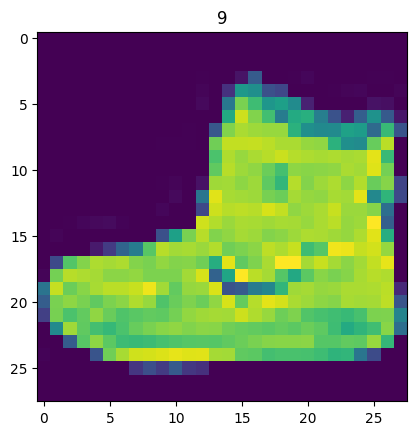

In [ ]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

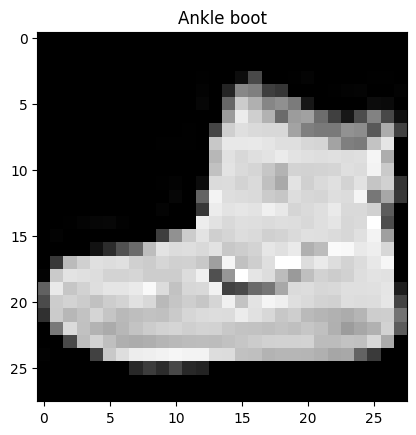

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

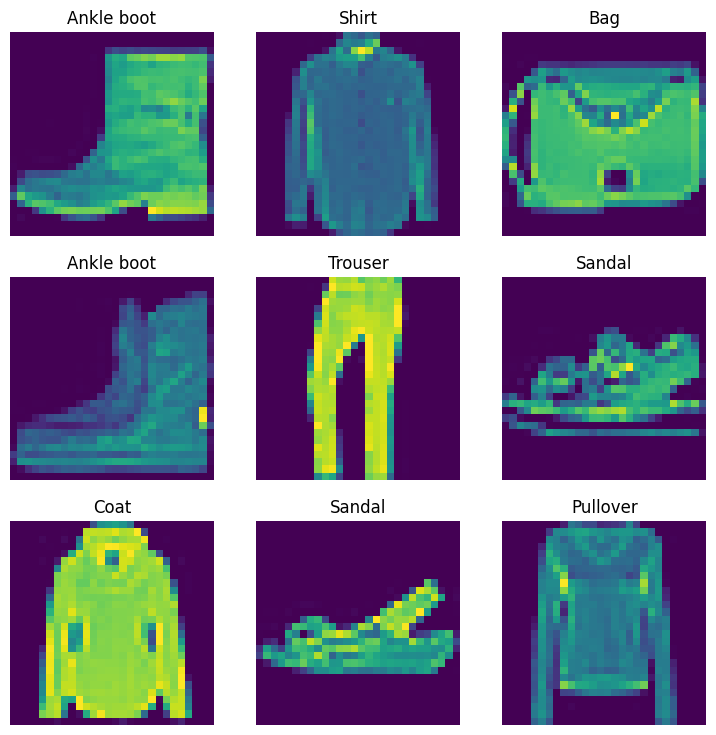

In [ ]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 3,3

for i in range(1, rows*cols+1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  train_features_random, train_label_random = train_data[random_index]

  fig.add_subplot(rows, cols, i)
  plt.imshow(train_features_random.squeeze())
  plt.title(class_names[train_label_random])
  plt.axis(False)

In [ ]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
iter(train_dataloader)

In [ ]:
# Check out what's inside the training dataloader
train_features, train_label = next(iter(train_dataloader))

train_features, train_label

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
train_features.shape, train_label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
len(train_label), len(train_features)

(32, 32)

Text(0.5, 1.0, 'Dress')

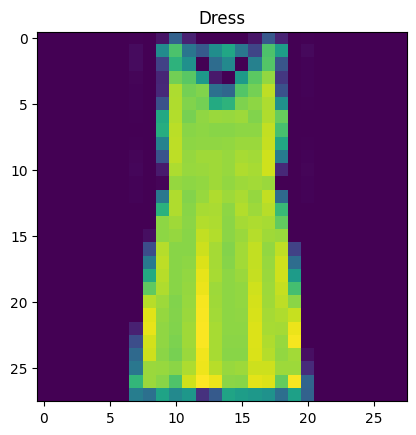

In [ ]:
torch.manual_seed(42)

random_index = torch.randint(0, len(train_label), size=[1]).item()
train_features_random, train_label_random = train_features[random_index], class_names[train_label[random_index]]

plt.imshow(train_features_random.squeeze())
plt.title(train_label_random)

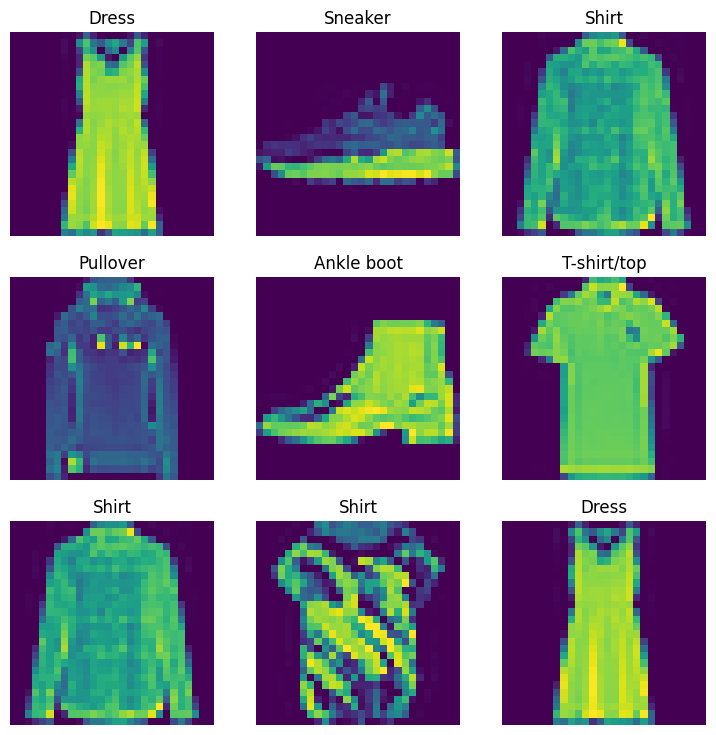

In [ ]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 3,3

for i in range(1, rows*cols+1):
  random_index = torch.randint(0, len(train_label), size=[1]).item()
  train_features_random, train_label_random = train_features[random_index], class_names[train_label[random_index]]

  fig.add_subplot(rows, cols, i)
  plt.imshow(train_features_random.squeeze())
  plt.title(train_label_random)
  plt.axis(False)

In [ ]:
class FashionMNISTModel1(nn.Module):
  def __init__(self, input_shape: int, hidden_layers: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_layers),
        nn.Linear(in_features = hidden_layers, out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModel1(input_shape = 784,hidden_layers = 10,output_shape = len(class_names))

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_loss = 0

  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()

    y_pred = model_1(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  train_loss /= len(train_dataloader)

  #Testing
  test_acc, test_loss = 0,0

  model_1.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_1(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 32.420 seconds


In [ ]:
torch.manual_seed(42)

def eval_model(model, data, loss, accuracy):
  model.eval()

  loss_test, accuracy_test = 0,0
  with torch.inference_mode():
    for X,y in data:

      y_pred = model(X)

      loss_test += loss(y_pred, y)

      accuracy_test += accuracy(y_true = y, y_pred = y_pred.argmax(dim=1))

    loss_test /= len(data)
    accuracy_test /= len(data)


  return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss_test.item(),
            "model_acc": accuracy_test}

In [ ]:
model_1_results = eval_model(model = model_1, data=test_dataloader,
    loss=loss_fn, accuracy=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
torch.manual_seed(42)

class FashionMNISTmodel2(nn.Module):
  def __init__(self, input_shape, hidden_input, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Liner(in_features=input_shape, out_features=hidden_input),
        nn.ReLu(),
        nn.Liner(in_features=hidden_input, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_2 = FashionMNISTModel1(input_shape = 784,hidden_layers = 10,output_shape = len(class_names))

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

def train_step(model, data, optimizer, loss_fn, acc_fn):
  train_loss, train_acc = 0,0
  for batch, (X,y) in enumerate(data):
    model.train()

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss /= len(data)
  train_acc /= len(data)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(model, data, loss, acc):
  test_loss, test_acc = 0,0

  model.eval()
  with torch.inference_mode():
    for X,y in data:

      y_pred = model(X)

      test_loss += loss_fn(y_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


    test_loss /= len(data)
    test_acc /= len(data)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  train_step(data=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        acc_fn=accuracy_fn
    )
  test_step(data=test_dataloader,
        model=model_2,
        loss=loss_fn,
        acc=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu)

Epoch: 0
---------
Train loss: 0.59039 | Train accuracy: 79.17%
Test loss: 0.50954 | Test accuracy: 82.04%

Epoch: 1
---------
Train loss: 0.47633 | Train accuracy: 83.32%
Test loss: 0.47989 | Test accuracy: 83.20%

Epoch: 2
---------
Train loss: 0.45503 | Train accuracy: 84.05%
Test loss: 0.47664 | Test accuracy: 83.43%

Train time on None: 26.931 seconds


In [ ]:
model_2_results = eval_model(model = model_2, data=test_dataloader,
    loss=loss_fn, accuracy=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Model 2: Building a Convolutional Neural Network (CNN)

In [ ]:
class FashionMNISTModel3(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,# default
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,# default
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,# default
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,# default
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # Where did this in_features shape come from?
        # It's because each layer of our network compresses and changes the shape of our inputs data.
        nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )

  def forward(self, x:torch.Tensor):
    x = self.block_1(x)

    x = self.block_2(x)

    x = self.classifier(x)

    return x

In [ ]:
torch.manual_seed(42)
model_3 = FashionMNISTModel3(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names))
model_3

FashionMNISTModel3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  train_step(data=train_dataloader,
        model=model_3,
        loss_fn=loss_fn,
        optimizer=optimizer,
        acc_fn=accuracy_fn
    )
  test_step(data=test_dataloader,
        model=model_3,
        loss=loss_fn,
        acc=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_3 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu)

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on None: 136.746 seconds


In [ ]:
model_3_results = eval_model(model = model_3, data=test_dataloader,
    loss=loss_fn, accuracy=accuracy_fn)
model_3_results

{'model_name': 'FashionMNISTModel3',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_1_results, model_2_results, model_3_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel1,0.476639,83.426518
1,FashionMNISTModel1,0.476639,83.426518
2,FashionMNISTModel3,0.327190,88.069089


In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob)

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);